01 - Carga de datos de csv (estaciones_bici.csv) en un DataFrame

Para esta practica vamos a necesitar la libreria de pandas para el tratamiento y analisis de los datos y matplotlib para graficar los resultados.

In [33]:
import pandas as pd

In [34]:
from os import path

In [35]:
import matplotlib.pyplot as plt

In [36]:
#Creamos la ruta de nuestro archivo csv:
bicis_path= path.join('estaciones_bici.csv')

In [37]:
#Pandas tiene metodos específicos para leer los csv directamente, le pasamos la ruta donde esta guardado y como esta delimitado:
bicis=pd.read_csv(bicis_path,sep=';')

In [38]:
#Visualizamos nuestro dataframe: lo asociamos a la variable "data" con la que trabajaremos durante la actividad,
#escribimos las columnas de nuestro dataframe a mano:
data=bicis[['station','total','download_date','available']]

In [39]:
#Realizamos un .sample para que nos muestre 5 filas aleatorias de nuestro dataframe:
display(data.sample(5))

,station,total,download_date,available
17637,269,15,2019-02-11 13:23:06.921,1
11440,21,16,2019-02-11 06:54:35.512,1
22932,262,20,2019-02-11 18:49:11.005,6
9118,158,15,2019-02-11 03:48:24.203,15
8082,132,15,2019-02-11 02:46:12.603,11


02 - Obtención del número de estaciones que tienen un total de 30 bornetas

In [40]:
#Si imprimimos por pantalla la columna 'station', observamos que tenemos estaciones repetidas:
data['station']

0         64
1         73
2         63
3         64
4         65
        ... 
27542    260
27543    261
27544    268
27545    269
27546    276
Name: station, Length: 27547, dtype: int64

In [41]:
#Por lo que tenemos que borrar los duplicados para conocer el numero de estaciones unicas que tienen un total de 30 bornetas.
#Realizamos un .drop_duplicates sobre el campo 'station', quedandonos con el ultimo elemento,
#sin modificar el dataframe original:
station_unic=data.drop_duplicates(subset='station',keep='last',inplace=False)
#Calculo la longitud de la condición que me pide el enunciado y obtengo el numero de estaciones 
#que tienen un total de 30 bornetas:
len(station_unic[station_unic['total']==30])

11

03 - Número de estación con la media más alta de bicis disponibles

In [42]:
#Agrupo mi dataframe por el campo 'station' y realizo la media:
station_u=data.groupby('station').mean()
#Busco en función del campo 'available'(bicis disponibles) cual es la media mas alta:
station_u['available'].max()

31.26

In [43]:
#Imprimo por pantalla la estacion que cumple la condicion anterior:
station_u[station_u['available']==station_u['available'].max()]

,total,available
station,,
50,40.0,31.26


In [44]:
#Solución: Estacion 50.

04 - Realizar el histograma de bicis disponibles de la estación del punto anterior

array([[<AxesSubplot:title={'center':'available'}>]], dtype=object)

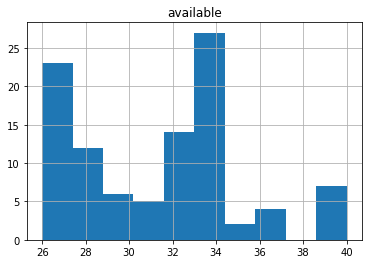

In [45]:
#Me creo un nuevo Dataframe con los datos de la estacion 50:
station_50=data[data['station']==50]
#Grafico el histograma para la columna de bicis disponibles:
station_50.hist(column='available')

05 - Realizar gráfica con la línea temporal de bicis disponibles de la estación del punto anterior. Pista, es necesario cambiar el índice a uno tipo fecha

In [46]:
#Transformo los datos de la columna 'download_date' a formato fecha:
data['download_date'] = pd.to_datetime(data['download_date'])

C:\Users\AnaRodriguezDomingue\AppData\Local\Temp\ipykernel_15748\203996886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['download_date'] = pd.to_datetime(data['download_date'])


In [47]:
#verifico el cambio de formato (datetime64)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27547 entries, 0 to 27546
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   station        27547 non-null  int64         
 1   total          27547 non-null  int64         
 2   download_date  27547 non-null  datetime64[ns]
 3   available      27547 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 861.0 KB


In [48]:
# Recuerdo que tengo la información guardada en el dataframe 'station_50':
display(station_50)

,station,total,download_date,available
74,50,40,2019-02-10 18:13:39.827,39
350,50,40,2019-02-10 18:29:13.135,36
625,50,40,2019-02-10 18:44:43.728,33
901,50,40,2019-02-10 19:00:14.475,31
1177,50,40,2019-02-10 19:15:48.800,33
...,...,...,...,...
26239,50,40,2019-02-11 22:41:56.937,32
26515,50,40,2019-02-11 22:57:27.760,33
26791,50,40,2019-02-11 23:12:58.602,33
27067,50,40,2019-02-11 23:28:29.903,32


<function matplotlib.pyplot.show(close=None, block=None)>

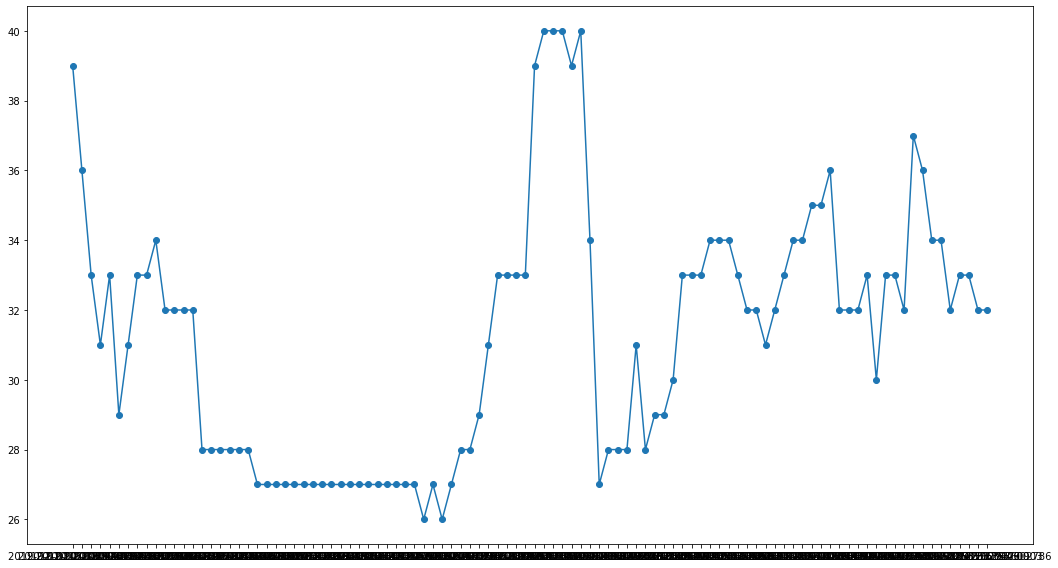

In [50]:
#Grafico la linea temporal con matplotlib con la funcion .plot_date() que se utiliza para trazar datos que contienen fechas.
#Me creo una lista con los datos de fecha (eje x) y otra con los datos de bicis disponibles(eje y)
date=list(station_50['download_date'])
available=list(station_50['available'])
#Genero el grafico plt.plot_date(x,y)
plt.plot_date(date,available,linestyle='solid')
#Genero la escala del grafico:
plt.gcf().set_size_inches(15,8)
#Ajusto automáticamente los parámetros: 
plt.tight_layout()
#Visualizo el gráfico:
plt.show